In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import ConvexHull

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
# kolom target adalah nama2 bunga --> data.target_names = ['setosa' 'versicolor' 'virginica']

bucket = df[df['Target'] == 0] # membagi 3 dataset iris sesuai target (0, 1, 2)
bucket = bucket.iloc[:,[0,1]].values # mengambil atribut sepal width dan length lalu menjadikannya sbg array 2 dimensi

def partisiMatrixAbsisBased(M):
    '''
        Membagi matriks M[i][n] menjadi submatriks A[i..q][n] dan A[q+1..j][n]
        Masukan: matriks m x n dengan setiap elemennya terdiri dari 2 elemen (absis dan oordinat)
        Keluaran: submatriks A[i..q][n] dan A[q+1..j][n] dengan
                  A[i..q][n] lebih kecil dari A[q+1..j][n]
    '''
    pivot = M[(len(M) - 1) // 2][0] # ambil elemen tengah sbg pivot
    p = 0
    q = len(M) - 1
    while True:
        while (M[p][0] < pivot):
            p += 1
        # M[p][0] >= pivot
        while (M[q][0] > pivot):
            q -= 1
        # M[p][0] >= pivot
        if (p <= q):
            # swap
            temp = M[p][0]
            M[p][0] = M[q][0]
            M[q][0] = temp
            p += 1
            q -= 1
        if (p > q):
            break
    return q, M

print(bucket)
# output = partisiMatrixAbsisBased(bucket)
# print(output[0])
# print(output[1])


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]]


[13 41 36 18 14 15 32 22]


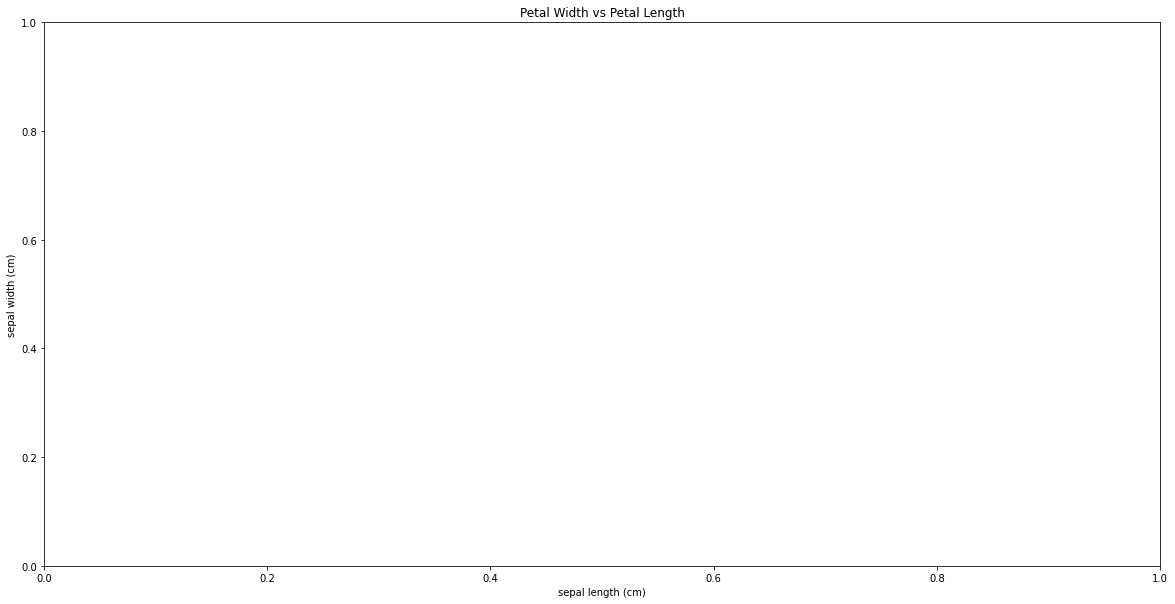

In [14]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')

# set label diagram
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

bucket = df[df['Target'] == 0] # membagi 3 dataset iris sesuai target (0, 1, 2)
bucket = bucket.iloc[:,[0,1]].values 
data_set = [[0, 3], [1, 1], [2, 2], [4, 4], [0, 0], [1, 2], [3, 1], [3, 3]]
hull = ConvexHull(bucket)
print(hull.vertices)

# for i in range(len(data.target_names)): 
#     bucket = df[df['Target'] == i] # membagi 3 dataset iris sesuai target (0, 1, 2)
#     bucket = bucket.iloc[:,[0,1]].values # mengambil atribut sepal width dan length lalu menjadikannya sbg array 2 dimensi
#     hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
#     plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
#     print(hull.simplices)
#     for simplex in hull.simplices:
#         plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
# plt.legend()